# Agilytic Case Project

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

path = os.getcwd() + '/datasets/agilytic_data/data/'

# Read the data
#data1 = pd.read_csv(path + 'dataset1.csv', index_col='ClientID')
#data2 = pd.read_csv(path + 'dataset2.csv', index_col='ID')

# Read the data
data1 = pd.read_csv(path + 'dataset1.csv',sep=";", index_col='ClientID')
data2 = pd.read_csv(path + 'dataset2.csv',sep=";", index_col='ID')

In [24]:
data1.tail()

,age,class of worker,detailed industry code,detailed occupation code,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed code,fill inc questionnaire for veteran's admin,veterans benefits code,weeks worked in year,year,taxable income amount,C1
ClientID,,,,,,,,,,,,,,,,,,,,,
501252,32.0,Self-employed-not incorporated,39,32,High school graduate,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Other service,...,?,?,Foreign born- Not a citizen of U S,2,Not in universe,2,52,94,0,6630
501253,62.0,Private,44,2,High school graduate,0,Not in universe,Married-civilian spouse present,Social services,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,0,6630
501254,16.0,Private,33,19,11th grade,0,High school,Never married,Retail trade,Sales,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,40,94,0,6630
501255,49.0,Private,31,39,Some college but no degree,1600,Not in universe,Never married,Utilities and sanitary services,Transportation and material moving,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,0,6630
501256,NaN,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,6630


In [18]:
data2.head()

,IQ,Political,State
ID,,,
1,99.0,Republican,Montana
1,78.0,Democrat,Texas
2,124.0,Republican,New York
3,80.0,Democrat,Virginia
4,108.0,Republican,Indiana


In [46]:
print(data1.dtypes)
print(data1.dtypes.value_counts())

# Get names of columns with missing values
cols_with_missing = [col for col in data1.columns
                     if data1[col].isnull().any()]

print(cols_with_missing)

age                                           float64
class of worker                                object
detailed industry code                          int64
detailed occupation code                        int64
education                                      object
wage per hour                                   int64
enroll in edu inst last wk                     object
marital stat                                   object
major industry code                            object
major occupation code                          object
race                                           object
hispanic origin                                object
sex                                            object
member of a labor union                        object
reason for unemployment                        object
full or part time employment stat              object
capital gains                                   int64
capital losses                                  int64
dividends from stocks       

In [29]:
dataOver50k = data1[data1['taxable income amount'] == 1]

print(dataOver50k.shape)

dataOver50k.head() 


(31097, 43)


,age,class of worker,detailed industry code,detailed occupation code,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed code,fill inc questionnaire for veteran's admin,veterans benefits code,weeks worked in year,year,taxable income amount,C1
ClientID,,,,,,,,,,,,,,,,,,,,,
58,42.0,Self-employed-incorporated,37,2,Some college but no degree,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,1,6222
65,47.0,Private,31,33,12th grade no diploma,0,Not in universe,Married-civilian spouse present,Utilities and sanitary services,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,1,6222
69,33.0,Private,30,33,Associates degree-occup /vocational,0,Not in universe,Separated,Communications,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,1,6222
81,58.0,Self-employed-not incorporated,35,17,Prof school degree (MD DDS DVM LLB JD),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,1,6222
89,54.0,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,1,6222


C:\Users\guill\Anaconda3\envs\kaggle_tuto\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guill\Anaconda3\envs\kaggle_tuto\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

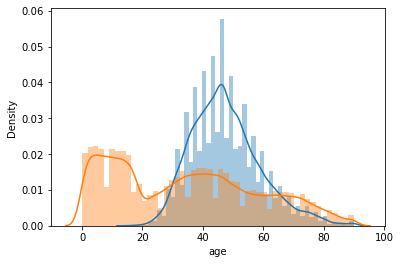

In [47]:
import matplotlib as plt

#plt.figure(figsize=(16,6))

data1Over50k = data1.loc[data1['taxable income amount'] == 1]
data1Under50k = data1.loc[data1['taxable income amount'] == 0]

sns.distplot(a=data1Over50k['age'], kde=True)
sns.distplot(a=data1Under50k['age'], kde=True)

C:\Users\guill\Anaconda3\envs\kaggle_tuto\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

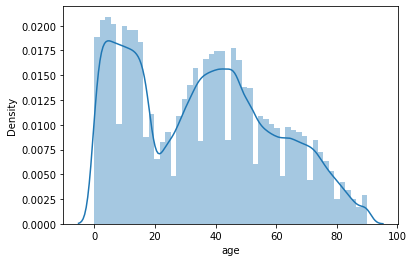

In [45]:
sns.distplot(a=data1['age'], kde=True)

C:\Users\guill\Anaconda3\envs\kaggle_tuto\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='taxable income amount', ylabel='age'>

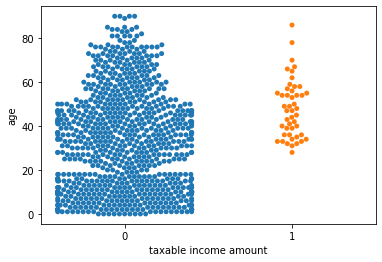

In [36]:
import seaborn as sns

sns.swarmplot(x = data1.loc[0:1000,'taxable income amount'],y = data1.loc[0:1000,'age'] )



In [51]:
# clean nan

data1Over50k_clean = data1Over50k.dropna()
data1Over50k_clean.shape

# Select numerical columns
numerical_cols = [cname for cname in data1Over50k_clean.columns if data1Over50k_clean[cname].dtype in ['int64', 'float64']]

print(data1Over50k_clean.shape)
print(numerical_cols)


(27944, 43)
['age', 'detailed industry code', 'detailed occupation code', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'instance weight', 'num persons worked for employer', 'own business or self employed code', 'veterans benefits code', 'weeks worked in year', 'year', 'taxable income amount', 'C1']


In [53]:
# split data :
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_test = train_test_split(data1Over50k_clean, train_size=0.8, test_size=0.2,random_state=0)

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]

In [67]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest()
clf.fit(X_train_num)
y_pred_train = clf.predict(X_train_num)
y_pred_test = clf.predict(X_test_num)

df_y_pred_train = pd.DataFrame(y_pred_train)
df_y_pred_test = pd.DataFrame(y_pred_test)

df_y_pred_train.index = X_train_num.index
df_y_pred_test.index = X_test_num.index

In [68]:
df_y_pred_train.head()

,0
ClientID,
78135,1
183227,-1
143002,1
487536,1
132105,1


In [69]:
df_y_pred_test.head()

,0
ClientID,
421321,-1
191593,1
50351,1
211776,1
265013,1


In [70]:
# possible percentage of frauds :

nFraud = abs(df_y_pred_train[df_y_pred_train[0] == -1].sum())
print(len(df_y_pred_train))
total = len(df_y_pred_train)
print(nFraud)
print(nFraud/total)

22355
0    3415
dtype: int64
0    0.152762
dtype: float64


In [75]:
# fraudulous clients to check :

possible_fraud_tr = X_train_num[df_y_pred_train[0] == -1]
possible_fraud_te = X_test_num[df_y_pred_test[0] == -1]



In [77]:
possible_fraud_tr.head()

,age,detailed industry code,detailed occupation code,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed code,veterans benefits code,weeks worked in year,year,taxable income amount,C1
ClientID,,,,,,,,,,,,,,,
183227,86.0,0,0,0,6514,0,0,2597.42,0,0,2,0,94,1,7120
245061,65.0,43,10,2200,0,0,0,306.07,4,0,2,52,95,1,5140
111807,43.0,50,1,2500,15024,0,182,1295.75,1,0,2,52,94,1,7502
38719,68.0,0,0,0,9386,0,5000,852.27,1,0,2,26,94,1,6720
89843,40.0,45,11,0,99999,0,0,429.99,1,0,2,52,94,1,4950


In [76]:
possible_fraud_te.head()

,age,detailed industry code,detailed occupation code,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed code,veterans benefits code,weeks worked in year,year,taxable income amount,C1
ClientID,,,,,,,,,,,,,,,
421321,44.0,13,37,0,0,0,0,1694.46,6,0,1,52,94,1,1470
93547,69.0,0,0,0,0,0,4500,2592.69,0,0,1,0,95,1,7301
489582,39.0,44,2,1800,0,0,0,3382.46,4,2,2,52,95,1,6200
22270,69.0,0,0,0,20051,0,19000,1750.12,1,0,2,6,95,1,6043
461286,47.0,45,3,2050,0,1887,0,1236.82,6,2,2,48,95,1,1428
